# Adaptive Boosting (Adaboost)

## Bagging (bootstrapping aggregating)

In [1]:
# import wine data
import pandas as pd
df_wine = pd.read_csv('wine.data',header=None)

In [2]:
df_wine.columns=['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids'
                ,'Nonflavanoid phenols','Proanthocynins','Color intensity','Hue','OD280/OD315 of diluted wines',
                'Proline']

In [3]:
df_wine = df_wine[df_wine['Class label'] !=1] # drop class 1
y = df_wine['Class label'].values
X = df_wine[['Alcohol','OD280/OD315 of diluted wines']].values

In [7]:
# encode the data and split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [10]:
# Use sklearn bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)

In [12]:
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_features=1.0,max_samples=.8,
                        bootstrap=True,bootstrap_features=False,n_jobs=1,random_state=1)

In [13]:
# Compare a single tree and a bagging classifier
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train,y_train)
y_test_pred = tree.predict(X_test)
y_train_pred = tree.predict(X_train)
tree_train = accuracy_score(y_train,y_train_pred)
tree_test = accuracy_score(y_test,y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train,tree_test))

Decision tree train/test accuracies 1.000/0.833


In [14]:
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.917


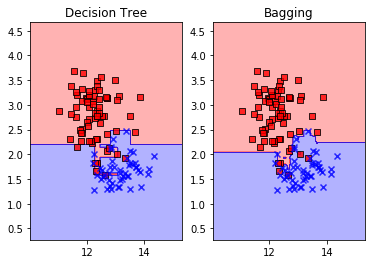

In [15]:
# Plot decision regions
from Perceptron import plot_decision_regions
import matplotlib.pyplot as plt

plt.subplot(121)
plot_decision_regions(X,y,classifier=tree)
plt.title('Decision Tree')

plt.subplot(122)
plot_decision_regions(X,y,classifier=bag)
plt.title('Bagging')
plt.show()


## Adaboost

In [21]:
# import classifier
from sklearn.ensemble import AdaBoostClassifier
from Decision_tree import Decision_Tree
import numpy as np

In [47]:
# weak learner is a stump (simplest tree with depth 1)
tree = DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=1)
tree_own = Decision_Tree(max_depth=3,impurity_fun='entropy')
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, random_state=1,learning_rate=0.1)

In [48]:
tree.fit(X_train,y_train)
tree_own.fit(X_train,y_train,np.ones(y_train.shape)/len(y_train))
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          learning_rate=0.1, n_estimators=500, random_state=1)

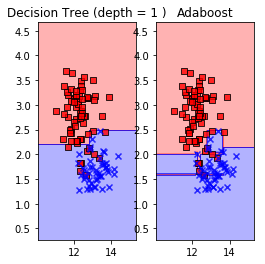

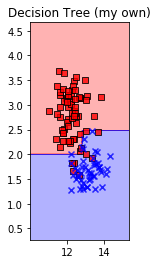

In [49]:
plt.subplot(131)
plot_decision_regions(X,y,classifier=tree)
plt.title('Decision Tree (depth = 1 )')

plt.subplot(132)
plot_decision_regions(X,y,classifier=ada)
plt.title('Adaboost')
plt.show()

plt.subplot(133)
plot_decision_regions(X,y,classifier=tree_own)
plt.title('Decision Tree (my own)')
plt.show()

In [ ]:
Decision_Tree()